In [1]:
from prody import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.graph_objects as go
from scipy.interpolate import griddata

### Importation of PMF Data

In [2]:
pmf_data = np.loadtxt('holo_p_cont_meta6.pmf')
dihedrals = pmf_data[:,0]
distances = pmf_data[:,1]
energy = pmf_data[:,2]
np.shape(energy)

(972,)

#### Data Implementation
X axis will be dihedrals, Y axis is setted as distances and Z axis is energy

In [3]:
X = -dihedrals #Because our dihedrals are opposite
Y = distances
Z_energy = energy

In [4]:
# Reshape X, Y, and Z_energy into 2D arrays
X_2D = X.reshape(-1,(len(set(Y))))
Y_2D = Y.reshape((len(set(X)), -1))
Z_energy_2D = Z_energy.reshape((len(set(X))),(len(set(Y))))

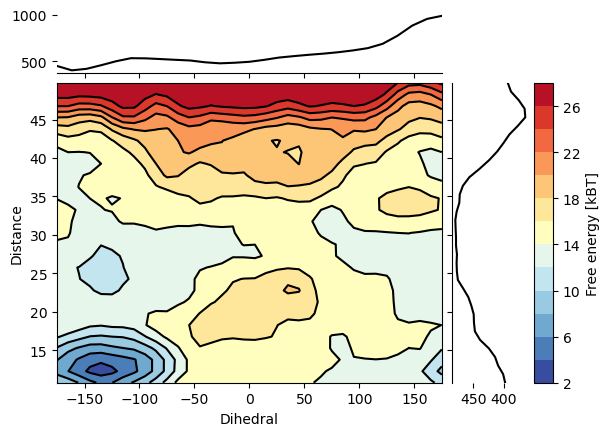

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import gaussian_filter

# Assuming X_2D, Y_2D, and Z_energy_2D are loaded or defined here
#Z_energy_2D = np.where(Z_energy_2D > 17, 17, Z_energy_2D)
#Z_energy_2D = np.where(Z_energy_2D > 17, np.nan, Z_energy_2D)
sigma = 0.75  # Gaussian filter smoothing factor
Z_energy_2D_smooth_g = gaussian_filter(Z_energy_2D, sigma)

# Use original X_2D and Y_2D to create a meshgrid if not already 2D
if X_2D.ndim == 1:
    X_2D, Y_2D = np.meshgrid(X_2D, Y_2D)

# Adjust x_new and y_new to directly use original X_2D and Y_2D values
x_new = np.linspace(np.min(X), np.max(X), Z_energy_2D_smooth_g.shape[1])
y_new = np.linspace(np.min(Y), np.max(Y), Z_energy_2D_smooth_g.shape[0])
X_2D_new, Y_2D_new = np.meshgrid(x_new, y_new)

# Plotting starts here
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", size="20%", pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", size="20%", pad=0.1, sharey=ax)

contourf = ax.contourf(X_2D, Y_2D, Z_energy_2D_smooth_g, levels=15, cmap='RdYlBu_r')
ax.contour(X_2D, Y_2D, Z_energy_2D_smooth_g, levels=15, colors='k')

# Calculate histograms
hist_x_smooth = np.sum(Z_energy_2D_smooth_g, axis=0)
hist_y_smooth = np.sum(Z_energy_2D_smooth_g, axis=1)
ax_histx.plot(x_new, hist_x_smooth, color='k')
ax_histy.plot(hist_y_smooth, y_new, color='k')
ax_histy.invert_xaxis()

# Setting up axes
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf, cax=cax, label='Free energy [kBT]')

ax.set_xlabel('Dihedral')
ax.set_ylabel('Distance')

ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['bottom'].set_visible(False)

plt.show()

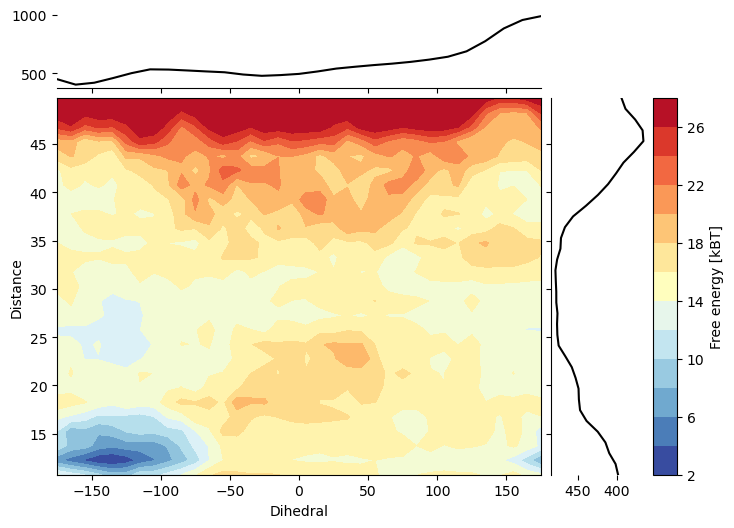

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# Assume X_2D, Y_2D, Z_energy_2D are defined here
# Your code to load or define X_2D, Y_2D, Z_energy_2D goes here

# Create a figure with subplots

fig, ax = plt.subplots(figsize=(8, 6))

# Create a contour plot
contour = ax.contourf(X_2D, Y_2D, Z_energy_2D, levels=15,cmap='RdYlBu_r')

# Create marginal histograms
histx = np.sum(Z_energy_2D, axis=0)
histy = np.sum(Z_energy_2D, axis=1)


# Create axes for marginal histograms
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", size="20%",  pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right",  size="20%",  pad=0.1, sharey=ax)

# Calculate the bin edges for histograms, assuming X_2D and Y_2D are linearly spaced

# Plot the marginal histograms

# For the y-histogram, use barh and invert the axis to match the orientation


ax_histx.plot(x_new, hist_x_smooth, color='k')
ax_histy.plot(hist_y_smooth, y_new, color='k')
ax_histy.invert_xaxis()



# Setting up axes
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf, cax=cax, label='Free energy [kBT]')

ax.set_xlabel('Dihedral')
ax.set_ylabel('Distance')

ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['bottom'].set_visible(False)

# Show the plot
plt.show()